# **Recognition of Objects using Convolutional Neural-networks**
  Objective of the project is to build and and train a neural-network model capable of classifying a set of images using Tensorflow, Keras Library

  -Shashank P

In [ ]:
# importing required modules

import keras
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

import random

In [ ]:
# we are using the cifar10 data-set for this project 
# loading the data into training and testing components


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# overvie of data
print('Training images : {}'.format(x_train.shape))
print('Testing images : {}'.format(x_test.shape))

Training images : (50000, 32, 32, 3)
Testing images : (10000, 32, 32, 3)


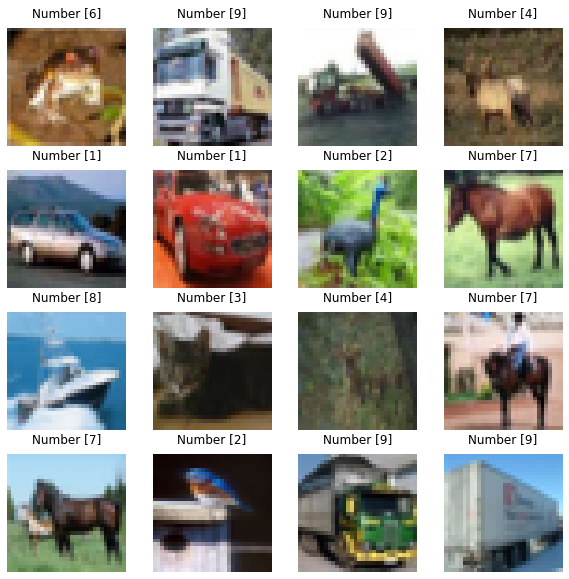

In [ ]:
# overview of images in data using matplotlib

%matplotlib inline
fig, axs = plt.subplots(4,4, figsize=(10, 10)) 

for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))
fig.show()

## Pre-Processing the data
  Here, we scale, preprocess the data so as to reduce anomalies during passing the data to the model

In [ ]:
# reshape the image data-sets of training and testing (x_train, x_test)

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
input_shape= (32, 32, 3)

In [ ]:
# converting the data to float-type so as to scale the data in the range (0, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [ ]:
# one-hot encoding

n_classes = 10 # picture categories in the data 

# before one-hot encoding
print(y_train.shape)

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
# after one-hot encoding
print(y_train.shape)

(50000, 1)
(50000, 10)


## **Building the Model**
  Building the models using different layers availabe through tensorflow 

In [ ]:
# model

model = Sequential()

# convolutional
model.add(Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output
model.add(Dense(10, activation='softmax'))

In [ ]:
# compiling and fitting data into data

model.compile(optimizer='adam', 
              loss= 'categorical_crossentropy', 
              metrics= ['accuracy'])

model.fit(x_train, y_train, batch_size= 128, epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 587s 2s/step - loss: 1.2468 - accuracy: 0.5520 - val_loss: 1.0329 - val_accuracy: 0.6344
Epoch 2/10
391/391 [==============================] - 523s 1s/step - loss: 0.9748 - accuracy: 0.6556 - val_loss: 0.8484 - val_accuracy: 0.7084
Epoch 3/10
391/391 [==============================] - 518s 1s/step - loss: 0.8297 - accuracy: 0.7119 - val_loss: 0.7736 - val_accuracy: 0.7298
Epoch 4/10
391/391 [==============================] - 513s 1s/step - loss: 0.7382 - accuracy: 0.7429 - val_loss: 0.7096 - val_accuracy: 0.7541
Epoch 5/10
391/391 [==============================] - 516s 1s/step - loss: 0.6635 - accuracy: 0.7695 - val_loss: 0.6963 - val_accuracy: 0.7615
Epoch 6/10
391/391 [==============================] - 524s 1s/step - loss: 0.6018 - accuracy: 0.7887 - val_loss: 0.6609 - val_accuracy: 0.7750
Epoch 7/10
391/391 [==============================] - 538s 1s/step - loss: 0.5500 - accuracy: 0.8064 - val_loss: 0.6963 - val_accuracy: 0.7642

## Evaluating Model and Predict values
  Using the trained value , we can measure the acuracy of the model and try to predict the images.

In [ ]:
# Image labels

classes = range(0, 10)

names = ['airplane', 
         'automobile', 
         'bird', 
         'cat', 
         'deer', 
         'dog', 
         'frog', 
         'horse', 
         'ship', 
         'truck']

In [ ]:
# Predicting Images

# zip names of classes to make dict
class_labels = dict(zip(classes, names))

# generate a batch of 10 random images
#n = list(np.random.randint(low = 0,high=10000,size=10))

batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis= -1)

# make predictions
predictions = model.predict(batch, verbose= 1)

print(predictions)

1/1 [==============================] - 0s 44ms/step
[[1.17692136e-04 7.88798025e-06 3.77759971e-02 1.29702277e-02
  5.12282372e-01 8.37834626e-02 2.40202789e-04 3.52750659e-01
  3.44725413e-05 3.70932103e-05]
 [3.02130902e-05 3.02601511e-05 1.08652599e-01 1.27159879e-01
  5.89876957e-02 4.99549747e-01 1.97436094e-01 7.91629869e-03
  7.57094458e-05 1.61497010e-04]
 [2.31785962e-05 7.50922045e-05 5.96871898e-02 5.62196709e-02
  4.08824453e-05 3.62411849e-02 8.44604969e-01 2.95226672e-03
  4.66461825e-05 1.08927044e-04]
 [5.33738742e-08 1.43658765e-08 2.30969654e-05 9.89178061e-01
  2.33418628e-04 2.67585530e-03 7.87727442e-03 8.01161150e-06
  1.01962286e-07 4.19642947e-06]
 [1.48802100e-08 9.99980688e-01 1.12923553e-13 3.51694455e-12
  6.12310123e-15 2.34424351e-15 3.22747552e-13 1.52935915e-14
  8.45652085e-06 1.08518452e-05]
 [4.99742271e-07 9.99727309e-01 9.05216180e-10 4.19918877e-10
  1.27646071e-11 1.62936331e-12 5.70979097e-10 1.83655348e-12
  8.05070067e-06 2.64111935e-04]
 [4.15

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0
0.99999994
1.0
1.0000001
1.0
0.99999994
1.0
1.0
0.99999994


In [ ]:
# results

class_results = np.argmax(predictions, axis= -1)
print(class_results)

[4 5 6 3 1 1 3 6 8]


## Final Object Detection

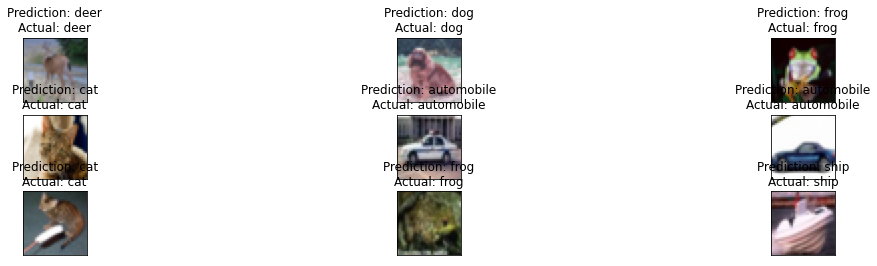

In [ ]:
# testing the model

figs, axs = plt.subplots(3, 3, figsize = (19, 4))
fig.subplots_adjust(hspace= 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_results[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img)

plt.show()
